In [20]:
#코랩 사용 시 - 글꼴 업데이트
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

'sudo'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.
'sudo'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.
'rm'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [ ]:
!pip install Image
!pip install wordcloud
!pip install konlpy
!pip install wordcloud
!pip install konlpy

#코랩 전용
# !apt-get update -qq
# !apt-get install fonts-nanum* -qq

In [164]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize

import matplotlib.font_manager as fm
import warnings

import matplotlib.pyplot as plt
import seaborn as sns
import konlpy.tag
from collections import Counter
import re

from matplotlib import rc
from PIL import Image
import numpy as np

from dateutil.relativedelta import relativedelta
from datetime import datetime, timedelta

#경고문 출력 x
import warnings
warnings.filterwarnings(action='ignore') 

import matplotlib.font_manager as fm
import os

In [165]:
os.chdir("C:/anaconda/캡스톤 유기견")

In [166]:
#검색어 생성
def search_word():
    keyword = ''
    
    global add_word #포함어
    
    if add_word == '':
        add_word1 = ''
    else:
        add_word1 = " +"+add_word

    global stopword # 제외어

    if stopword == '':
        stopword1 = ''
    else:
        stopword1 = " -"+stopword

    keyword = main_word + add_word1 + stopword1
    return keyword

In [167]:
main_word = '유기견' #메인검색어
add_word = '' #포함어

stopword = '' #제외어

In [168]:
os.listdir("./결과물/")

['네이버블로그 크롤링_유기견.xlsx',
 '유기견 연관어 빈도수.csv',
 '유기견_불용어처리.csv',
 '유기견_연관어 빈도수_20190101to20191231.jpg',
 '유기견_연관어 빈도수_20190501to20200501.csv',
 '유기견_연관어 빈도수_20190501to20200501.jpg',
 '유기견_연관어 빈도수_20210503to20220503.csv',
 '유기견_연관어 빈도수_20210503to20220503.jpg',
 '유기견_워드클라우드_top100_20190101to20191231.jpg',
 '유기견_워드클라우드_top100_20190501to20200501.jpg',
 '유기견_워드클라우드_top100_20210503to20220503.jpg',
 '유기견_크롤링결과_from20190101to20191231.xlsx',
 '유기견_크롤링결과_from20210101to20220507.xlsx']

In [169]:
keyword = search_word()
print('검색어:', keyword)

# 검색 기간 설정
# 검색 기간 설정
period = datetime.now()-relativedelta(years=1) # 1년 전
start_date = 20210101 # ~부터
end_date = 20220507 # ~까지

year = str(end_date)[:4]

검색어: 유기견


In [170]:
# 크롤링 파일 불러오기
data = pd.read_excel(f"./결과물/{keyword}_크롤링결과_from{start_date}to{end_date}.xlsx")
# data = data.drop(columns = ['Unnamed: 0'])

In [171]:
content_dummy = data['content']  # 문단만 따로 변수 정의

In [172]:
Okt = konlpy.tag.Okt() #자연어-한국어 분석 모델 변수 지정 

In [173]:
# 품사 추출 함수 정의
def noun_filtering(text):
    group = []
    
    #토크나이징 후 키워드 별 품사 지정 / 튜플화
    for i, w in enumerate(text):
        if w == '':
            w = '확인불가'
            filtered_content = w.replace('.', '').replace(',','').replace("'","").replace('·', ' ').replace('=','').replace('\n','')
            Okt_morphs = Okt.pos(filtered_content)
            group.append(Okt_morphs)
        else:
            filtered_content = w.replace('.', '').replace(',','').replace("'","").replace('·', ' ').replace('=','').replace('\n','')
            Okt_morphs = Okt.pos(filtered_content)
            group.append(Okt_morphs)
        
#         print('#', i)
#         print(group[i])
    return group

In [174]:
group = noun_filtering(content_dummy)

In [175]:
# 명사로 지정된 키워드만 추출
Noun_words = []
for d in group:
    for word, pos in d:
        if pos == 'Noun':
            Noun_words.append(word)
print(Noun_words)

['유기동물', '입양', '첫', '준비', '생명', '책임감', '두둑', '준비', '작고', '동물', '하나요', '나이', '사랑', '어른', '동물', '눈', '위', '두', '가지', '마음', '준비', '분', '감동', '입양', '후기', '전해', '이번', '사연', '동물', '구조', '및', '입양', '단체', '동물', '세상', '동행', '통해', '반려견', '금동', '남아', '세', '추정', '를', '입양', '김기중', '님', '사연', '저', '금동', '가족', '살', '금동', '올해', '세', '추정', '로', '강아지', '이', '나이', '강아지', '마리', '저', '웃음', '내', '이름', '금동', '내', '좀', '안이', '입양', '전', '금동', '이야기', '금동', '지난', '서울', '금천구', '발견', '유기견', '전', '미용', '온몸', '털', '금동', '유기동물', '보호', '소인', '동물', '구조', '관리', '협회', '협', '경기', '양주시', '로', '가게', '곳', '직원', '말', '해', '애교', '아이', '왜', '금동', '보호', '소', '사람', '무척', '외모', '애교', '금동', '왜', '보호', '소', '직원', '이해', '금동', '이의', '입양', '공고', '사진', '사람', '선호', '작고', '성격', '금동', '나이', '입양', '잘되지', '해', '거기', '백내장', '피부질환', '등', '입양', '문의', '동물', '구조', '및', '입양', '단체', '동행', '금동', '금동', '동행', '운영', '입양', '카페', '서울', '동대문구', '가족', '제', '금동', '처음', '만난', '곳도', '금동', '가족', '저', '인', '가구', '혼자', '시간', '가족', '의미', '중', '학대', '동물', '사연', '죄

In [176]:
# 불용어 불러오기
stop_list = pd.read_csv("./불용어.csv", header= None, encoding = 'utf-8')
added_words = ['유기견','분','월드','내','오늘','처음','말','정도','살','확인','불가']

stopword = list(stop_list[0])
for w in added_words:
    stopword.append(w)

unique_Noun_words = set(Noun_words)
for word in unique_Noun_words:
    if word in stopword:
        while word in Noun_words: Noun_words.remove(word)  # 최종결과 : Noun_words

In [177]:
c = Counter(Noun_words)
print(c.most_common(30)) # 상위 30개 출력하기

[('입양', 3718), ('보호', 3025), ('강아지', 2206), ('봉사', 2180), ('러피', 1446), ('가족', 1371), ('후원', 1332), ('유기동물', 1247), ('사람', 1207), ('개', 1138), ('생각', 1051), ('마음', 999), ('집', 881), ('동물', 874), ('사진', 860), ('사랑', 749), ('산책', 715), ('친구', 697), ('터', 688), ('마리', 655), ('구조', 596), ('기부', 550), ('봉사자', 540), ('반려견', 501), ('반려동물', 496), ('간식', 480), ('대구', 462), ('진행', 453), ('임보', 450), ('센터', 440)]


In [178]:
df = pd.DataFrame(columns = ['keyword','frequency'])

In [179]:
data = dict(c.most_common())

In [180]:
keywords_df = list(data.keys())
frq_df = list(data.values())

In [181]:
df['keyword'] = keywords_df
df['frequency'] = frq_df

In [182]:
df.to_csv(f"./결과물/연관어 빈도수/{keyword}_연관어 빈도수_{start_date}to{end_date}.csv", encoding = 'euc-kr')

In [183]:
top30 = dict(sorted(dict(c.most_common(30)).items(), key = lambda x:x[1]))

In [184]:
x = list(top30.keys()) #키워드
y = list(top30.values()) #데이터 값

emp_keyword = [ '보호','봉사', '터', '러피','센터', '후원','분양']
i_list = []
for t in emp_keyword:
    if t in x:
        loc = x.index(t)
        i_list.append(loc)
    else:
        pass

In [185]:
rate_y = []
for i in y:
    y1 = str(round(i / sum(y) * 100, 2)) + '%'
    rate_y.append(y1)

In [186]:
rate_y

['1.37%',
 '1.41%',
 '1.42%',
 '1.44%',
 '1.5%',
 '1.55%',
 '1.57%',
 '1.69%',
 '1.72%',
 '1.86%',
 '2.05%',
 '2.15%',
 '2.18%',
 '2.23%',
 '2.34%',
 '2.69%',
 '2.73%',
 '2.75%',
 '3.12%',
 '3.28%',
 '3.56%',
 '3.77%',
 '3.9%',
 '4.16%',
 '4.28%',
 '4.52%',
 '6.81%',
 '6.89%',
 '9.45%',
 '11.62%']

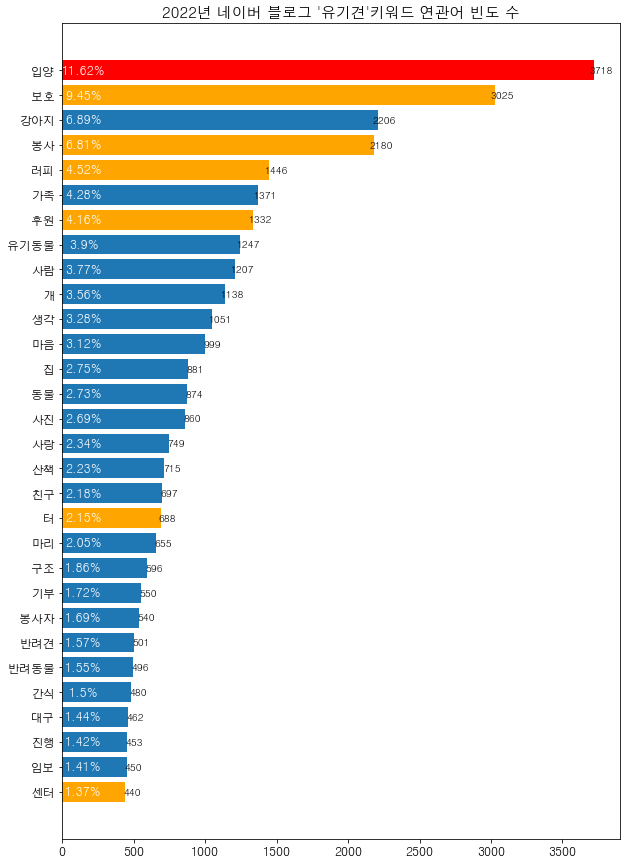

In [190]:
# ## 코랩 전용

# font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf' # 나눔 고딕
# font_name = fm.FontProperties(fname=path, size=10).get_name()


## 주피터노트북/랩 전용
font_path = "C:/Windows/Fonts/H2GTRM.TTF"
font_name = fm.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

plt.figure(figsize=(10,15));
plt.barh(x, y)
x1 = plt.barh(x[-1], y[-1], color = 'r'); #입양

for i in i_list:
    x2 = plt.barh(x[i], y[i], color = 'orange'); #보호

    

for i, v in enumerate(x):
    plt.text(y[i]+50, i, y[i],                 # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
              fontsize = 10, 
              color='black',
              horizontalalignment='center',  # horizontalalignment (left, center, right)
              verticalalignment='center')
    
for i, v in enumerate(x):
    plt.text(150, i, rate_y[i],                 # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
              fontsize = 12, 
              color='white',
              weight ='bold',
              horizontalalignment='center',  # horizontalalignment (left, center, right)
              verticalalignment='center')

plt.title(f"{year}년 네이버 블로그 '유기견'키워드 연관어 빈도 수", fontsize = 15, fontweight = 'bold')
plt.rc('font', family=font_name)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
# plt.legend(handles = x2, labels=['강연관도'], loc = 'lower right')
plt.savefig(f"./결과물/연관어 빈도수/시각화/{keyword}_연관어 빈도수_{start_date}to{end_date}.jpg")

In [191]:
## 워드클라우드 생성

import wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from os import path

noun_text = ''
for word in Noun_words:
    noun_text = noun_text +' '+word

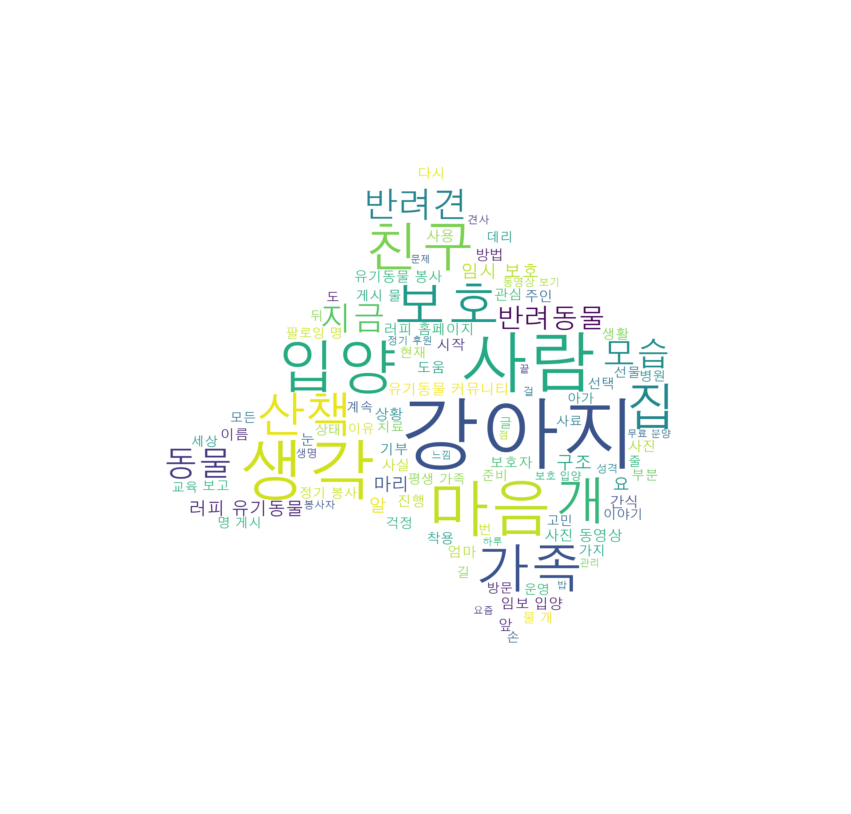

In [192]:
icon = Image.open('./pngegg (1).png').convert("RGBA")
mask = Image.new("RGBA", icon.size, (255,255,255,255))
mask.paste(icon,icon)
mask = np.array(mask)
    
wordcloud = WordCloud(max_font_size=230,
                      max_words= 100,background_color='white',
                      mask = mask, relative_scaling=.5,
                      font_path=font_path,
                      prefer_horizontal = True).generate(noun_text)

plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [193]:
wordcloud.to_file(f'./결과물/워드클라우드/{keyword}_워드클라우드_top100_{start_date}to{end_date}.jpg')